In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


## Loading data

In [93]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
          'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv("housing.csv", delim_whitespace=True, names = column_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Preprocessing data

In [94]:
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df)

df = pd.DataFrame(normalized_data, columns = column_names)


## Visualizing data

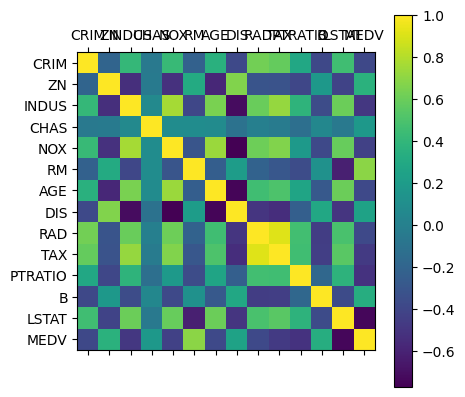

In [95]:
correlation_matrix = df.corr()

plt.matshow(correlation_matrix)
plt.xticks(range(len(column_names)), column_names)
plt.yticks(range(len(column_names)), column_names)
plt.colorbar()
plt.show()

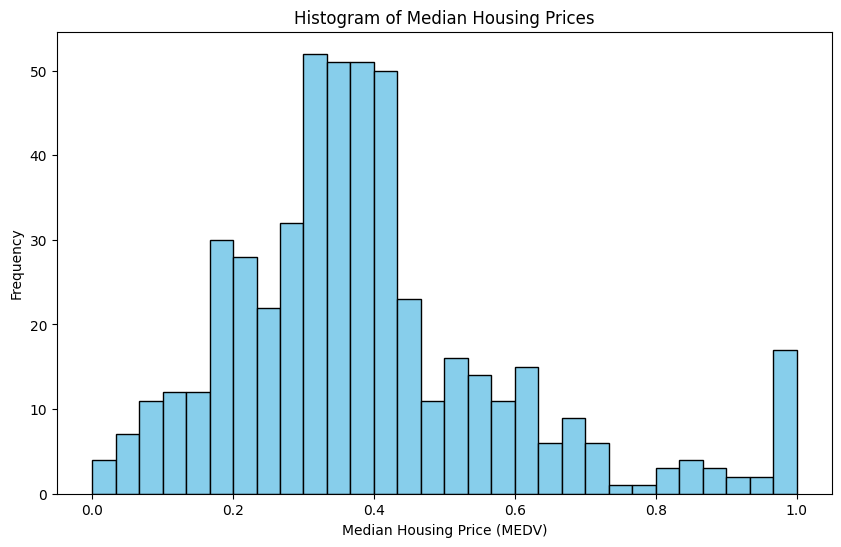

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(df['MEDV'], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Median Housing Price (MEDV)')
plt.ylabel('Frequency')
plt.title('Histogram of Median Housing Prices')

plt.show()


## Train/test split

In [97]:
X = df.drop(columns=['MEDV'],axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


## Model building: linear regression

In [98]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

## Model building: random forest regressor

In [99]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

## Model building: simple neural network

In [100]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = NeuralNet(input_size=X_train.shape[1])

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

epochs = 100
for epoch in range(epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

with torch.no_grad():
    y_pred_nn = model(X_test_tensor).detach().numpy()

Epoch 1/100, Loss: 0.0595819354057312
Epoch 2/100, Loss: 0.021109942346811295
Epoch 3/100, Loss: 0.03796941787004471
Epoch 4/100, Loss: 0.030040647834539413
Epoch 5/100, Loss: 0.020512595772743225
Epoch 6/100, Loss: 0.011152476072311401
Epoch 7/100, Loss: 0.03960582986474037
Epoch 8/100, Loss: 0.006518549285829067
Epoch 9/100, Loss: 0.01290141325443983
Epoch 10/100, Loss: 0.009770436212420464
Epoch 11/100, Loss: 0.013240614905953407
Epoch 12/100, Loss: 0.00209906161762774
Epoch 13/100, Loss: 0.006588303949683905
Epoch 14/100, Loss: 0.013076958246529102
Epoch 15/100, Loss: 0.007584744598716497
Epoch 16/100, Loss: 0.0065285139717161655
Epoch 17/100, Loss: 0.005384679883718491
Epoch 18/100, Loss: 0.003760170191526413
Epoch 19/100, Loss: 0.00344456871971488
Epoch 20/100, Loss: 0.0014666374772787094
Epoch 21/100, Loss: 0.008194091729819775
Epoch 22/100, Loss: 0.004625711590051651
Epoch 23/100, Loss: 0.003259988036006689
Epoch 24/100, Loss: 0.010380832478404045
Epoch 25/100, Loss: 0.00565864

## Results and Discussion

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Linear Regression:")
print(f"MSE: {mse_lr}")
print(f"MAE: {mae_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R-squared: {r2_lr}")
print()
print("Random Forest Regression:")
print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R-squared: {r2_rf}")
print()
print("Neural Network Regression:")
print(f"MSE: {mse_nn}")
print(f"MAE: {mae_nn}")
print(f"RMSE: {rmse_nn}")
print(f"R-squared: {r2_nn}")


Linear Regression:
MSE: 0.011995614555542482
MAE: 0.07086871035306333
RMSE: 0.1095244929481186
R-squared: 0.6687594935356318

Random Forest Regression:
MSE: 0.003989791217622853
MAE: 0.04519128540305013
RMSE: 0.06316479413108898
R-squared: 0.8898280319450698

Neural Network Regression:
MSE: 0.004592770432955918
MAE: 0.04647975922702185
RMSE: 0.06776998179840332
R-squared: 0.8731776852913314


### Model Discussion
Linear Regression:
-   Performance: The linear regression model has decent performance, with an R-squared value of 0.669, indicating that it explains around 66.9% of the variance in the target variable.
-   Interpretation: The model's simplicity makes it easy to interpret. However, it may struggle to capture complex nonlinear relationships in the data.

Random Forest Regression:
-   Performance: The random forest regression model outperforms the linear regression model significantly, with a much lower MSE and higher R-squared value (0.890).
-   Interpretation: Random forest regression can capture complex nonlinear relationships and interactions between features. It's robust to outliers and doesn't require feature scaling.

Neural Network Regression:
-   Performance: The neural network regression model performs slightly worse than the random forest model but better than the linear regression model, with an R-squared value of 0.876.
-   Interpretation: Neural networks have the flexibility to learn complex patterns in the data. However, they may require more computational resources for training and tuning, and their black-box nature makes interpretation challenging.

### Feature Discussion
Based on the correlation matrix and heatmap:
-   Features like 'RM' (average number of rooms), 'ZN' (proportion of residential land), and 'B' (proportion of blacks) have a positive correlation with 'MEDV', indicating that as these features increase, 'MEDV' tends to increase as well.
-   Features like 'LSTAT' (% lower status of the population), 'PTRATIO' (pupil-teacher ratio), and 'INDUS' (proportion of non-retail business acres) have a negative correlation with 'MEDV', indicating that as these features increase, 'MEDV' tends to decrease.